# MICROSOFT MOVIE STUDIO EXPLORATION AND DATA ANALYSIS

## 1. Business Understanding

### a) Introduction 
Microsoft is venturing into the entertainment industry by establishing a new movie studio to create original video content. The company recognizes the success of big players in the industry and aims to capitalize on this trend. However, lacking experience in movie production, Microsoft needs insights into the current landscape of successful films at the box office. The goal is to inform strategic decisions regarding the types of films that will resonate well with audiences and maximize profitability.

### b) Problem Statement
Microsoft wants to succeed in the entertainment sector by navigating the complexities of the movie studio business by launching a new venture that will produce original video content that will appeal to viewers and yield maximum profit. Microsoft understands the necessity to learn about the present world of box office-performing films, as it has no past expertise in film creation. The strategic decisions the studio needs to make about the kinds of movies it should make to attract viewers and survive in the cutthroat industry depend heavily on this information.


### c) Main Objective
To empower Microsoft's new movie studio with actionable insights into the dynamics of the film industry, particularly focusing on box office performance by leveraging data analysis and exploration techniques using pandas, where the goal is to identify the key factors contributing to the success of movies, including genres, talented writers, directors, and popularity metrics.

### d) Specific Objectives

1. To explore Box Office Performance by analysing historical data on movies, focusing on key metrics such as total gross, average rating, and number of votes to understand box office performance.

2. Translate insights into recommendations by Providing actionable recommendations for Microsoft's movie studio, suggesting specific genres, writers, directors, and popularity metrics to consider for future movie productions.

3. Position for success by strategically positioning the new movie studio to create content that not only achieves financial success but also resonates with a diverse audience, fostering long-term growth and success in the entertainment market. 


### e) Experimental Design
1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Conclusions and Recommendations


### f) Data Understanding 
The data used in this project are data collected from:
1. https://www.boxofficemojo.com/
2. https://www.imdb.com/
3. https://www.rottentomatoes.com/
4. https://www.themoviedb.org/
5. https://www.the-numbers.com/

The imdb dataset contained 8 tables:
|No.| Table    |
|---| ---       |
|1|movie_basics|
|2|directors|
|3|known_for|
|4|movie_akas|
|5|movie_ratings|
|6|persons|
|7|principals|
|8|writers|


## 2. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

##

## 3. Reading and merging the Data

## 3a. Reading the data

In [3]:
im = os.path.join('im.db')
# Open up a connection
conn = sqlite3.connect(im)
# Initialize a cursor
cursor = conn.cursor()

In [4]:
table_name_query = """
SELECT name 
AS 'Table Names' 
FROM sqlite_master 
WHERE type='table';
"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
rt_movies_info = pd.read_csv('rt.movie_info.tsv', sep='\t', encoding='latin1')
# rt_movies_info.head()



In [6]:
rt_movies_info.shape

(1560, 12)

In [7]:
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='latin1')
# rt_reviews.head()

In [8]:
movie_budget = pd.read_csv("tn.movie_budgets.csv")
# movie_budget.head()


In [9]:
movie_budget.shape

(5782, 6)

In [10]:
movie_gross = pd.read_csv("bom.movie_gross.csv")
movie_gross.rename(columns={'title': 'movie_title'}, inplace=True)
movie_gross.head()


,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
movie_gross.shape

(3387, 5)

In [12]:
movies = pd.read_csv('tmdb.movies.csv')
# movies.head()

In [13]:
movies.shape

(26517, 10)

####

### 3b. Acquiring the required data and merging ready for wrangling and visualization 

In [14]:
# acquiring averagerating, numvotes from "Movie Rating table"
movie_rating_query = """
SELECT movie_id, averagerating, numvotes
FROM movie_ratings;
"""
movie_rating_df = pd.read_sql(movie_rating_query, conn)
# movie_rating_df

In [15]:
# acquiring averagerating, numvotes from "Movie Rating table"
movie_basics_query = """
SELECT movie_id, primary_title, runtime_minutes, genres
FROM movie_basics;
"""
movie_basics_df = pd.read_sql(movie_basics_query, conn)
movie_basics_df

,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,None


In [16]:
#Acquiring writers name from writer and persons table
writers_query = """
SELECT writers.movie_id, persons.primary_name AS writer_name
FROM writers
JOIN persons ON writers.person_id = persons.person_id;
"""
writers_df = pd.read_sql(writers_query, conn)
writers_df

,movie_id,writer_name
0,tt0285252,Tony Vitale
1,tt0438973,Steve Conrad
2,tt0438973,Sean Sorensen
3,tt0462036,Bill Haley
4,tt0835418,Peter Gaulke
...,...,...
255866,tt8999892,Bradley T. Castle
255867,tt8999974,Daysi Burbano
255868,tt9001390,Bernard Lessa
255869,tt9004986,Fredrik Horn Akselsen


In [17]:
#Acquiring directors name from directors and persons table
directors_query = """
SELECT directors.movie_id, persons.primary_name AS director_name
FROM directors
JOIN persons ON directors.person_id = persons.person_id;
"""
directors_df = pd.read_sql(directors_query, conn)
directors_df


,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun
...,...,...
291166,tt8999974,Daysi Burbano
291167,tt9001390,Bernard Lessa
291168,tt9001494,Tate Nova
291169,tt9001494,Courtney Faye Powell


In [18]:
# Merge directors_df with writers_df on movie_id
merged_df = pd.merge(directors_df, writers_df, on='movie_id', how='outer', suffixes=('_director', '_writer'))

# Merge the result with movie_basics_df on movie_id
merged_df = pd.merge(merged_df, movie_basics_df, on='movie_id', how='outer')

# Merge the result with movie_rating_df on movie_id
final_df = pd.merge(merged_df, movie_rating_df, on='movie_id', how='outer')

#Rename primary_title to movie_title
final_df.rename(columns={'primary_title': 'movie_title'}, inplace=True)

# Display the resulting DataFrame
final_df

,movie_id,director_name,writer_name,movie_title,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,Tony Vitale,Tony Vitale,Life's a Beach,100.0,Comedy,3.9,219.0
1,tt0462036,Bill Haley,Bill Haley,Steve Phoenix: The Untold Story,110.0,Drama,5.5,18.0
2,tt0835418,Jay Chandrasekhar,Peter Gaulke,The Babymakers,95.0,Comedy,5.0,8147.0
3,tt0835418,Jay Chandrasekhar,Gerry Swallow,The Babymakers,95.0,Comedy,5.0,8147.0
4,tt0835418,Jay Chandrasekhar,Peter Gaulke,The Babymakers,95.0,Comedy,5.0,8147.0
...,...,...,...,...,...,...,...,...
48197722,tt9894302,NaN,NaN,Mai Gayatri Jadhav,NaN,Drama,NaN,NaN
48197723,tt9901352,NaN,NaN,Hamlet Poem Unlimited,60.0,Drama,NaN,NaN
48197724,tt9902734,NaN,NaN,Josh Groban Bridges from Madison Square Garden,NaN,None,NaN,NaN
48197725,tt9906262,NaN,NaN,Untitled BBC Music Documentary,NaN,Documentary,NaN,NaN


In [19]:
microsoft_df = pd.merge(final_df, movie_gross, on='movie_title', how='inner')
microsoft_df.drop(['studio', 'year', 'movie_id'], axis=1, inplace=True)
column_order = ['movie_title'] + [col for col in microsoft_df if col != 'movie_title']
microsoft_df = microsoft_df[column_order]

microsoft_df

,movie_title,director_name,writer_name,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,The Babymakers,Jay Chandrasekhar,Peter Gaulke,95.0,Comedy,5.0,8147.0,7900.0,NaN
1,The Babymakers,Jay Chandrasekhar,Gerry Swallow,95.0,Comedy,5.0,8147.0,7900.0,NaN
2,The Babymakers,Jay Chandrasekhar,Peter Gaulke,95.0,Comedy,5.0,8147.0,7900.0,NaN
3,The Babymakers,Jay Chandrasekhar,Gerry Swallow,95.0,Comedy,5.0,8147.0,7900.0,NaN
4,Octubre,Ernest Vila,Andrea Medina,80.0,Documentary,NaN,NaN,32100.0,96700
...,...,...,...,...,...,...,...,...,...
192247,Baaghi 2,Ahmed Khan,Abbas Hirapurwala,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000
192248,Baaghi 2,Ahmed Khan,Jojo Khan,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000
192249,Baaghi 2,Ahmed Khan,Niraj Kumar Mishra,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000
192250,Baaghi 2,Ahmed Khan,Sajid Nadiadwala,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000


##

##

## 4. DATA WRANGLING

In [20]:
#Checking for duplicate rows in the dataset
duplicate_columns = microsoft_df.columns[microsoft_df.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [21]:
# Check for null values in each column
null_values = microsoft_df.isnull().sum()

# Check data types of each column
data_types = microsoft_df.dtypes

# Combine null values and data types into a DataFrame
summary_df = pd.DataFrame({'Null Values': null_values, 'Data Types': data_types})
print(summary_df)

                 Null Values Data Types
movie_title                0     object
director_name             52     object
writer_name              319     object
runtime_minutes        21551    float64
genres                    73     object
averagerating           1339    float64
numvotes                1339    float64
domestic_gross           165    float64
foreign_gross          57703     object


In [22]:
# Dropping genres, with null values
microsoft_df.dropna(subset=['genres'], inplace=True)


In [23]:
# Drop rows with null values in the 'director_name' column
microsoft_df.dropna(subset=['director_name'], inplace=True)

In [24]:
# Drop rows with null values in the 'writer_name' column
microsoft_df.dropna(subset=['writer_name'], inplace=True)

In [25]:
# Dropping genres, with null values
microsoft_df.dropna(subset=['genres'], inplace=True)

In [26]:
# Drop rows with null values in the 'runtime_minutes' column
microsoft_df.dropna(subset=['runtime_minutes'], inplace=True)

In [27]:
# Drop rows with null values in the 'numvotes' column
microsoft_df.dropna(subset=['numvotes'], inplace=True)

In [28]:
# Calculate the average rating
average_rating = microsoft_df['averagerating'].mean()

# Replace null values with the calculated average
microsoft_df['averagerating'].fillna(average_rating, inplace=True)

In [29]:
# Replace null values with 0 in 'foreign_gross' and 'domestic_gross' columns
microsoft_df['foreign_gross'].fillna(0, inplace=True)
microsoft_df['domestic_gross'].fillna(0, inplace=True)

In [30]:
# Convert 'foreign_gross' column to float and replace non-numeric values with 0
microsoft_df['foreign_gross'] = pd.to_numeric(microsoft_df['foreign_gross'], errors='coerce').fillna(0)


In [31]:
# Check for null values in each column
null_values = microsoft_df.isnull().sum()

# Check data types of each column
data_types = microsoft_df.dtypes

# Combine null values and data types into a DataFrame
summary_df = pd.DataFrame({'Null Values': null_values, 'Data Types': data_types})
print(summary_df)

                 Null Values Data Types
movie_title                0     object
director_name              0     object
writer_name                0     object
runtime_minutes            0    float64
genres                     0     object
averagerating              0    float64
numvotes                   0    float64
domestic_gross             0    float64
foreign_gross              0    float64


In [32]:
#Checking for duplicate rows in the dataset
duplicate_columns = microsoft_df.columns[microsoft_df.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [33]:
#performing feature engineering to add a new column total_gross and popularity
microsoft_df['total_gross'] = (microsoft_df['domestic_gross']+microsoft_df['foreign_gross'])
microsoft_df['popularity'] = microsoft_df['averagerating'] * microsoft_df['numvotes']

microsoft_df

,movie_title,director_name,writer_name,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,popularity
0,The Babymakers,Jay Chandrasekhar,Peter Gaulke,95.0,Comedy,5.0,8147.0,7900.0,0.0,7900.0,40735.0
1,The Babymakers,Jay Chandrasekhar,Gerry Swallow,95.0,Comedy,5.0,8147.0,7900.0,0.0,7900.0,40735.0
2,The Babymakers,Jay Chandrasekhar,Peter Gaulke,95.0,Comedy,5.0,8147.0,7900.0,0.0,7900.0,40735.0
3,The Babymakers,Jay Chandrasekhar,Gerry Swallow,95.0,Comedy,5.0,8147.0,7900.0,0.0,7900.0,40735.0
8,Morning Glory,Roger Michell,Aline Brosh McKenna,107.0,"Comedy,Drama,Romance",6.5,67367.0,31000000.0,29000000.0,60000000.0,437885.5
...,...,...,...,...,...,...,...,...,...,...,...
192247,Baaghi 2,Ahmed Khan,Abbas Hirapurwala,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000.0,31200000.0,36720.0
192248,Baaghi 2,Ahmed Khan,Jojo Khan,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000.0,31200000.0,36720.0
192249,Baaghi 2,Ahmed Khan,Niraj Kumar Mishra,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000.0,31200000.0,36720.0
192250,Baaghi 2,Ahmed Khan,Sajid Nadiadwala,137.0,"Action,Thriller",5.0,7344.0,1300000.0,29900000.0,31200000.0,36720.0


#

#

## 5.DATA EXPLORATION AND ANALYSIS

#

### QUESTION 1. What is the most watched/streamed genres

In [34]:
# Group by 'genres' and calculate mean for 'numvotes' and 'total_gross'
genre_stats = microsoft_df.groupby('genres').agg({'numvotes': 'mean', 'total_gross': 'mean' , 'averagerating' : 'mean'}).reset_index()

# Sort by 'numvotes', averagerating and 'total_gross' in descending order
top_five_numvotes = genre_stats.sort_values(by='numvotes', ascending=False).head(5)
top_five_averagerating = genre_stats.sort_values(by='averagerating', ascending=False).head(5)
top_five_total_gross = genre_stats.sort_values(by='total_gross', ascending=False).head(5)



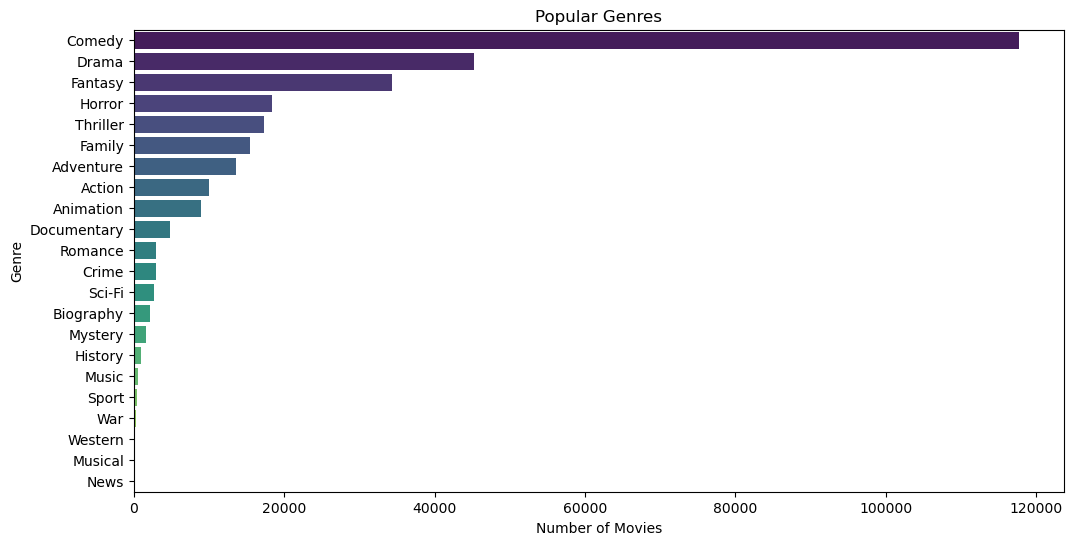

In [35]:
# Popular Genres
plt.figure(figsize=(12, 6))
genre_counts = microsoft_df['genres'].str.split(',').explode().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Popular Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


##### The Comedy genre is the most popular in terms of number of occurrence as it appears in over 10,000 movies, followed closely by Drama and Fantasy while western,musical and news record the poorest occurence. This is an indication of the popularity of comedy among the genres in terms of occurrence.

## 

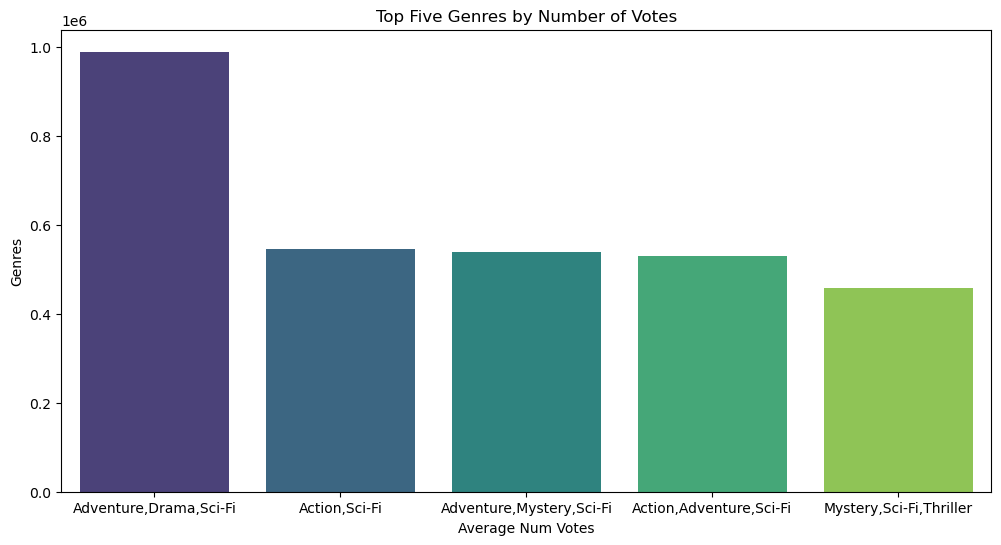

In [36]:
# Plot the bar chart for top five numvotes
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='numvotes', data=top_five_numvotes, palette='viridis')
plt.title('Top Five Genres by Number of Votes')
plt.xlabel('Average Num Votes')
plt.ylabel('Genres')
plt.show()

The highest genres in terms of number of votes, a combination of Adventure,Drama and Science Fiction is the lead, followed closely by Action and Science Fiction. It is also notable that Science Fiction followed very closely with Adventure makes the most appearance among the top five genres.

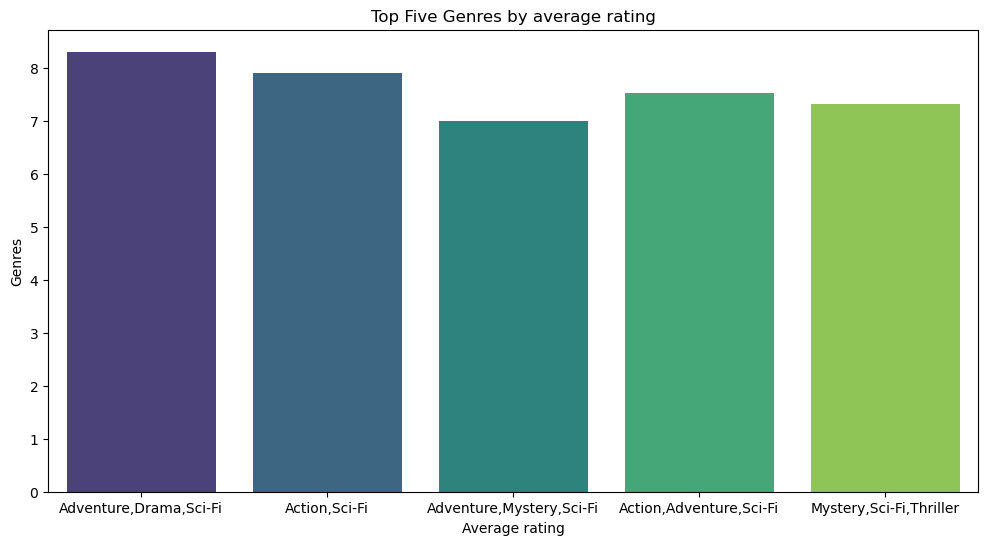

In [37]:
# Plot the bar chart for top five averagerating
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top_five_numvotes, palette='viridis')
plt.title('Top Five Genres by average rating')
plt.xlabel('Average rating')
plt.ylabel('Genres')
plt.show()

The highest genres in terms of average rating, a combination of Adventure,Drama and Science Fiction is the lead, followed closely by Action and Science Fiction. It is also notable that Science Fiction followed very closely with Adventure makes the most appearance among the top five genres.

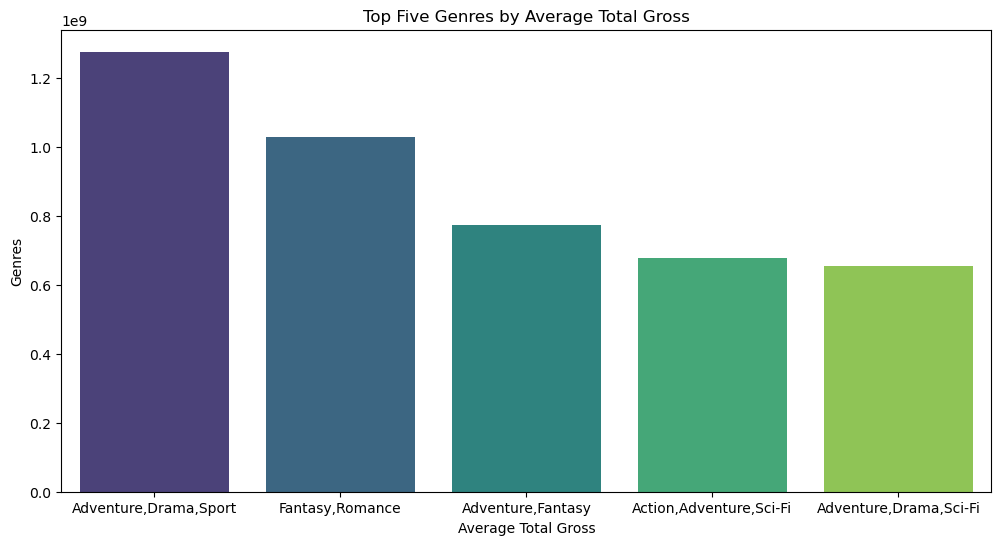

In [38]:

# Plot the bar chart for top five total gross
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='total_gross', data=top_five_total_gross, palette='viridis')
plt.title('Top Five Genres by Average Total Gross')
plt.xlabel('Average Total Gross')
plt.ylabel('Genres')
plt.show()

##### The highest genres in terms of total gross, a combination of Adventure,Drama and Sports is the lead, followed closely by Fantacy and Romance. It is also notable that Adventure makes the most appearance among the top five genres.

### QUESTION 2. What is the correlation between runtime minutes and the reap of gross

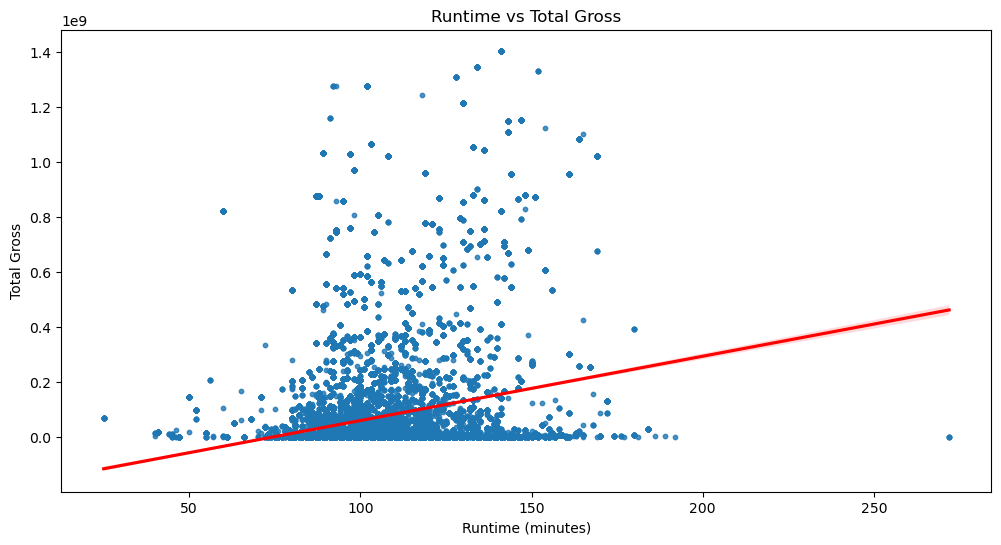

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='runtime_minutes', y='total_gross', data=microsoft_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Runtime vs Total Gross')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Gross')
plt.show()


From the graph above we can deduce there is a positive correlation between runtime and total gross. Therefore an increase in runtime gives an increase in total gross

### QUESTION 3. Who are the most popular writers


In [40]:
# Group by writer_name and aggregate total_gross, averagerating, numvotes, and genres
writer_stats = microsoft_df.groupby('writer_name').agg({
    'total_gross': 'sum',
    'averagerating': 'mean',
    'numvotes': 'sum',
    'genres': lambda x: x.mode().iloc[0]  # Select the most common genre for each writer
})

# Sort by total_gross, averagerating, and numvotes in descending order
top_writers_total_gross = writer_stats.sort_values(by='total_gross', ascending=False).head(5)
top_writers_average_rating = writer_stats.sort_values(by='averagerating', ascending=False).head(5)
top_writers_num_votes = writer_stats.sort_values(by='numvotes', ascending=False).head(5)

# Display the results
print("Top 5 writers based on total gross:")
print(top_writers_total_gross[['total_gross', 'genres']])

print("\nTop 5 writers based on average rating:")
print(top_writers_average_rating[['averagerating', 'genres']])

print("\nTop 5 writers based on number of votes:")
print(top_writers_num_votes[['numvotes', 'genres']])


Top 5 writers based on total gross:
                total_gross                      genres
writer_name                                            
Jack Kirby     1.699753e+11     Action,Adventure,Sci-Fi
Jared Bush     1.560688e+11  Adventure,Animation,Comedy
James Gunn     1.292478e+11                      Comedy
Stan Lee       1.256663e+11     Action,Adventure,Sci-Fi
Matt Portenoy  1.095120e+11                      Comedy

Top 5 writers based on average rating:
                averagerating       genres
writer_name                               
Richard Heap              9.2    Adventure
Drago Graf                9.1        Drama
Rebecca Abaffy            9.0  Documentary
Luke Abaffy               9.0  Documentary
Shannon Keith             8.8  Documentary

Top 5 writers based on number of votes:
                      numvotes  genres
writer_name                           
James Gunn         331053259.0  Comedy
Patrik Forsberg    314272400.0  Comedy
Bill O'Malley      314272400.0  Co

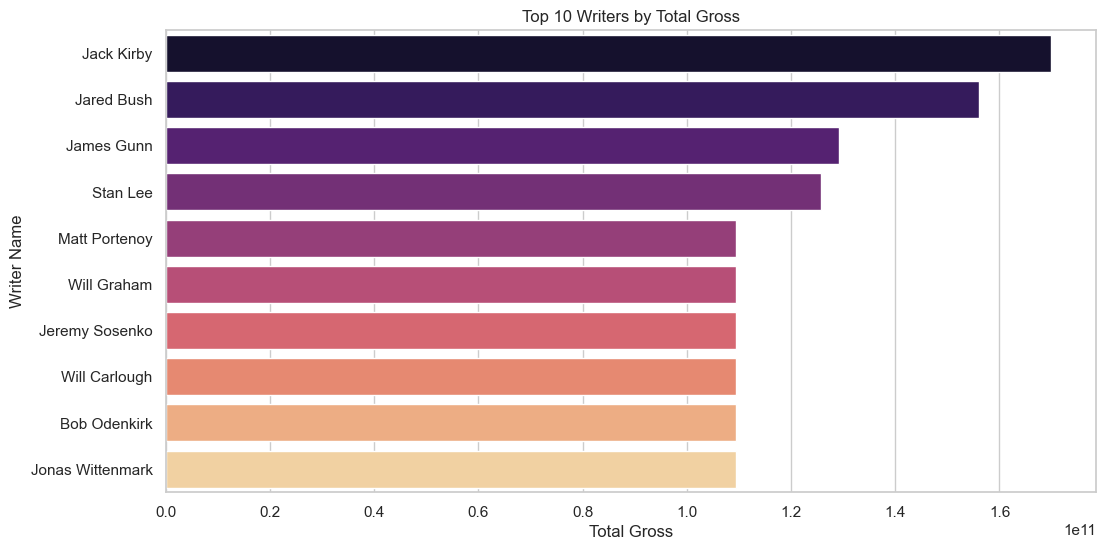

In [41]:
# Set the style for seaborn
sns.set(style="whitegrid")


# Top 10 Writers by Total Gross
top_writers_total_gross = writer_stats.sort_values(by='total_gross', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_writers_total_gross['total_gross'], y=top_writers_total_gross.index, palette="magma")
plt.title('Top 10 Writers by Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Writer Name')
plt.show()



##### Jack Kirby, an Action, Adventure, Sci-Fi writer is the highest rated in terms of the total gross generated both domestic and foreign. Jared Bush, an Adventure,Animation,Comedy, James Gunn a comedy writer and Stan Lee an Action,Adventure,Sci-Fi writer also have notable performs in terms of total gross. Portenoi, Graham, Sosenko, Carlough, Odenkirk and Wittenmark are also top writers in terms of gross the movies they have written generate

#

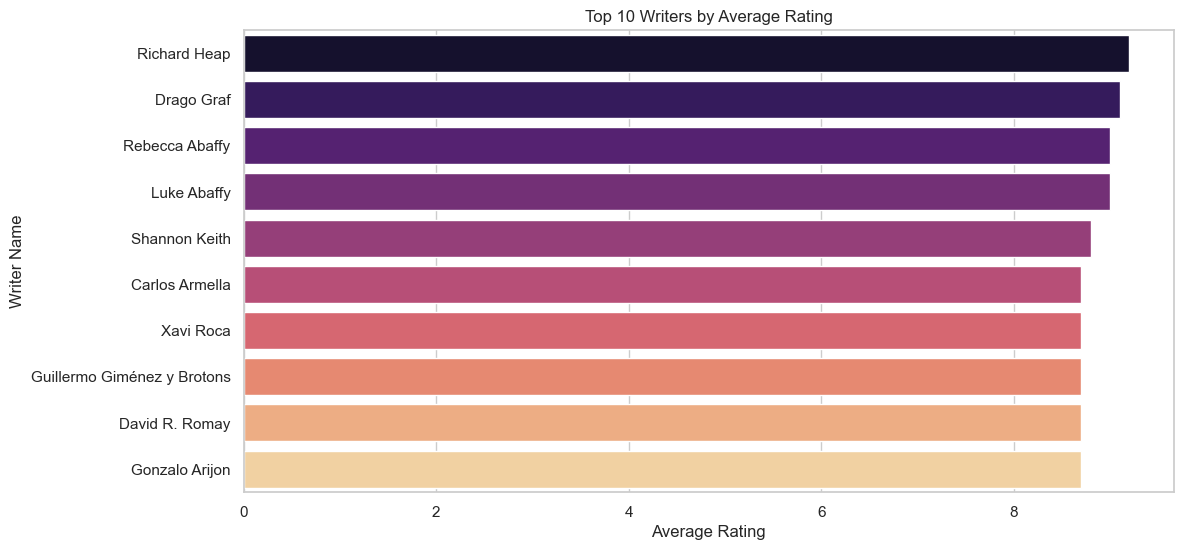

In [42]:
# Set the style for seaborn
sns.set(style="whitegrid")


# Top 10 Writers by Total Gross
top_writers_total_gross = writer_stats.sort_values(by='averagerating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_writers_total_gross['averagerating'], y=top_writers_total_gross.index, palette="magma")
plt.title('Top 10 Writers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Writer Name')
plt.show()


##### Richard Heap, an Adventure writer is the highest rated in terms of average ratings closely followed by Drago Graf. Rebecca Abaffy, Luke Abaffy and Shannon Keith all of whom are Documentary writers have also a equally higher rating in terms of average rating

#

# 

### QUESTION 4. Who are the most popular directors

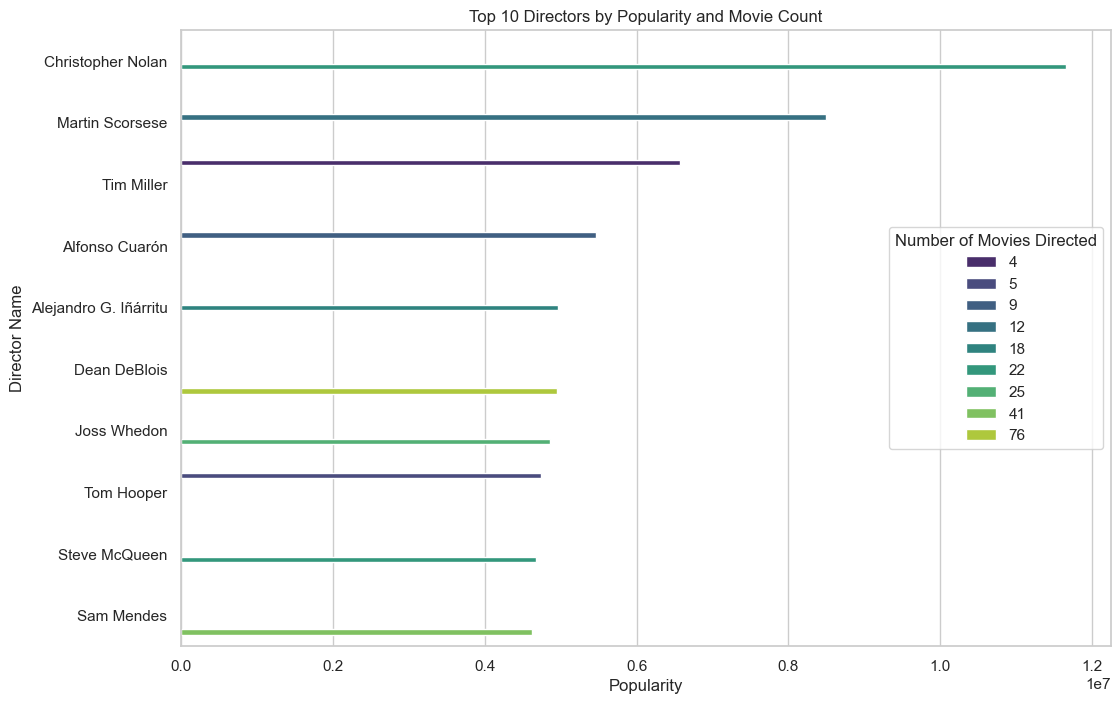

In [43]:
# Remove duplicates based on 'director_name'
unique_directors = microsoft_df.drop_duplicates(subset='director_name', keep='first')

# Get the top 10 directors based on the number of movies directed and popularity
top_directors = unique_directors.sort_values(by=['popularity', 'director_name'], ascending=[False, True]).head(10)

# Count the number of movies each director has directed
director_movie_counts = microsoft_df['director_name'].value_counts().reset_index()
director_movie_counts.columns = ['director_name', 'movie_count']

# Merge with the top directors
top_directors_with_counts = pd.merge(top_directors, director_movie_counts, on='director_name', how='left')

# Create a bar plot for the top 10 directors and the number of movies they have directed
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='director_name', data=top_directors_with_counts, hue='movie_count', palette='viridis')
plt.title('Top 10 Directors by Popularity and Movie Count')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.legend(title='Number of Movies Directed')
plt.show()


In terms of movie popularity Christopher Nolan tops the list of Directors. However Dean Deblois tops the list when it comes to the number of movies each have directed by a whooping 76 movies ahead of Chrisopher Nolan who has only directed 22 movies. 

#

#

### QUESTION 5. Which markets do well between domestic and foreign markets and what is there corelation

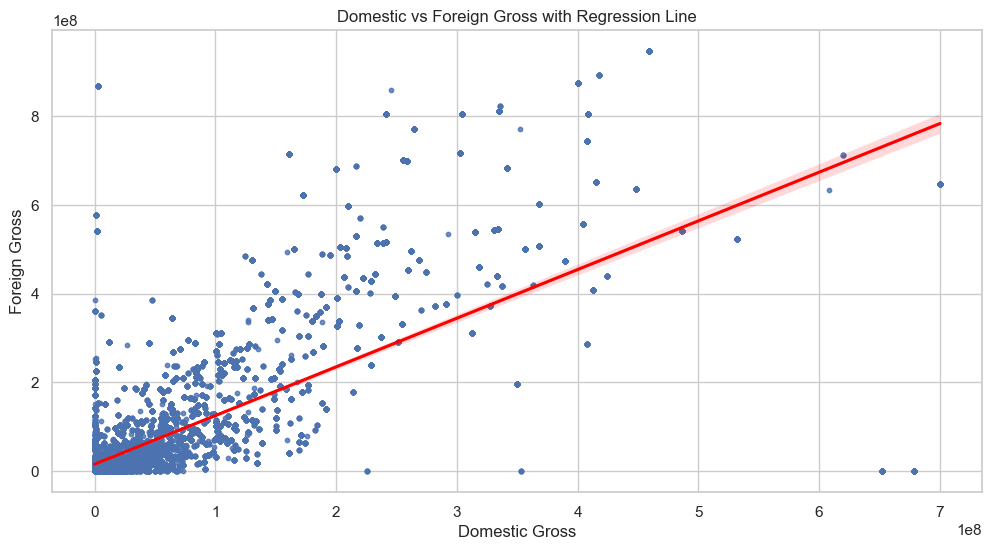

In [44]:
# Create a scatter plot for Domestic vs Foreign Gross with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='domestic_gross', y='foreign_gross', data=microsoft_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Domestic vs Foreign Gross with Regression Line')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.show()

plt.show()



##### There is a positive correlation between Domestic and Foreign Gross. An increase in domestic gross also replicates in an increase in Foreign gross.

## 9. Conclusions

1.	The most watched/streamed genre is comedy in terms of occurrence but a combination of Adventure, Drama and Sci-Fi does very well in terms of popularity and gross

2.	There is a positive correlation between runtime and reap gross, therefore an increase in runtime gives an increase in gross income, however most of the runtimes fall between the 90 and 150 minute

3.	The highest ranked writers Jack Kirby who writes Action, Adventure, Sci-Fi in terms of gross, while Richard Heap, an Adventure writer is the highest ranked in terms of average rating.

4.	In terms of movie popularity Christopher Nolan tops the list of Directors. However Dean Deblois tops the list when it comes to the number of movies each have directed by a whopping 76 movies ahead of Christopher Nolan who has only directed 22 movies.

5.	There is a positive correlation between Domestic and Foreign Gross. An increase in domestic gross also replicates in an increase in Foreign gross.


#

## 10. Recommendations

1.	The company should invest in Comedy, a little more emphasis in Adventure, Drama and Sci-Fi combinations.

2.	The company should invest in movies runtime, with an optimum of 90 to 150 minutes.

3.	The company should look forward to working with top writers in the various fields. They should work more with Jack Kirby when producing Action, Adventure and Sci-Fi movie combination.

4.	The company should work closely with director Christopher Nolan as he is more popular even though he has few movies compared to his counterparts, but however Dean Deblois, is a director the company should incorporate as he has better effort in directing with a whopping 76 directed movies.

5.	The company should invest in movies that do well both in terms domestic n=and foreign gross.
